In [195]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense,Flatten , activations
from sklearn.cross_validation import train_test_split
from keras.preprocessing.text import Tokenizer
import keras as ks 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix , mean_absolute_error
from sklearn.preprocessing import Imputer , OneHotEncoder
import warnings
from xgboost import XGBRegressor
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [211]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [272]:
Target = train_set.SalePrice

In [213]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [214]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<Figure size 1440x2160 with 0 Axes>

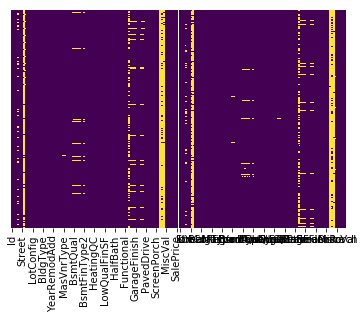

In [215]:
plt.figure(figsize=(20,30))
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(train_set.isnull(), cmap="viridis", ax=ax, cbar=False , yticklabels=False)
sns.heatmap(test_set.isnull(), cmap="viridis", ax=ax2, cbar=False , yticklabels=False)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [216]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [202]:
train_set.drop(['Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature'] , axis=1 , inplace=True)

In [203]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [204]:
test_set.drop(['Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature'] , axis=1 , inplace=True)

<Figure size 1440x2160 with 0 Axes>

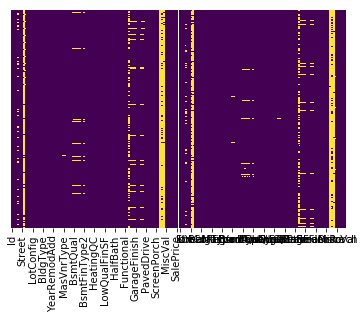

In [217]:
plt.figure(figsize=(20,30))
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(train_set.isnull(), cmap="viridis", ax=ax, cbar=False , yticklabels=False)
sns.heatmap(test_set.isnull(), cmap="viridis", ax=ax2, cbar=False , yticklabels=False)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [218]:
train_set.fillna(train_set.mean(),  inplace=True)

In [219]:
test_set.fillna(train_set.mean(),  inplace=True)

<Figure size 1440x2160 with 0 Axes>

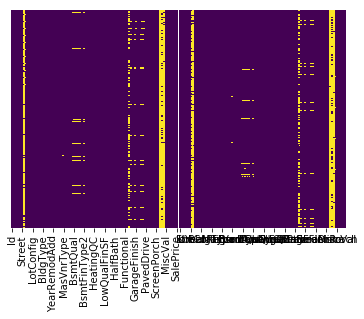

In [220]:
plt.figure(figsize=(20,30))
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(train_set.isnull(), cmap="viridis", ax=ax, cbar=False , yticklabels=False)
sns.heatmap(test_set.isnull(), cmap="viridis", ax=ax2, cbar=False , yticklabels=False)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [222]:
def get_data():
    train_data = pd.read_csv('train.csv')
    test_data = pd.read_csv('test.csv')
    return train_data , test_data

In [224]:
def combine_data():
    train , test = get_data()
    target = train.SalePrice
    train.drop(['SalePrice'] , axis = 1 , inplace= True)
    combine = train.append(test)
    combine.reset_index(inplace=True)
    combine.drop(['index' , 'Id'] , inplace=True , axis = 1)
    return combine , target

In [225]:
train_data , test_data = get_data()
combined , target = combine_data()

In [227]:
combined

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [228]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [249]:
def data_cleaner(df , col_type):
    if(col_type == 'num'):
        predictor = pd.DataFrame.select_dtypes(df, exclude=['object'])
    elif (col_type == 'no_num'):
        predictor = pd.DataFrame.select_dtypes(df , include=['object'])
    elif (col_type == 'all'):
        predictor = df
    cols_no_nans = []
    for col in predictor.columns:
        if not df[col].isnull().any():
            cols_no_nans.append(col)
    return cols_no_nans

In [250]:
num_cols = data_cleaner(combined , 'num')
cat_cols = data_cleaner(combined , 'no_num')

In [252]:

print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


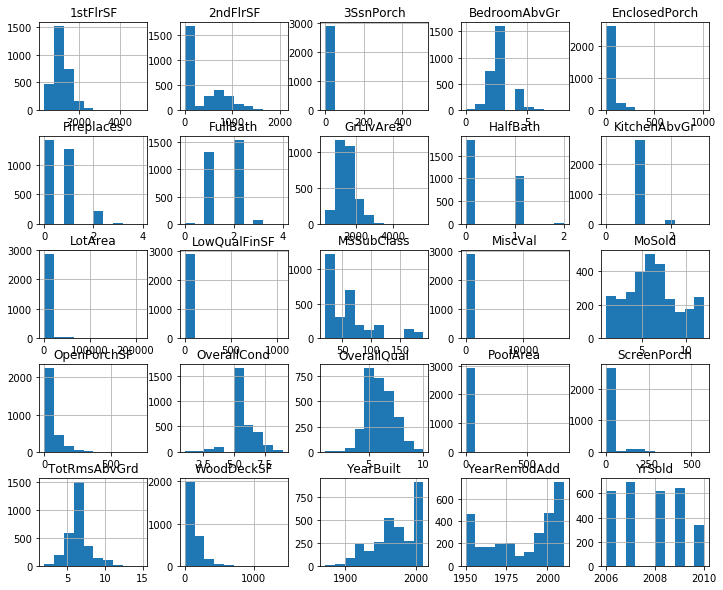

In [253]:

combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

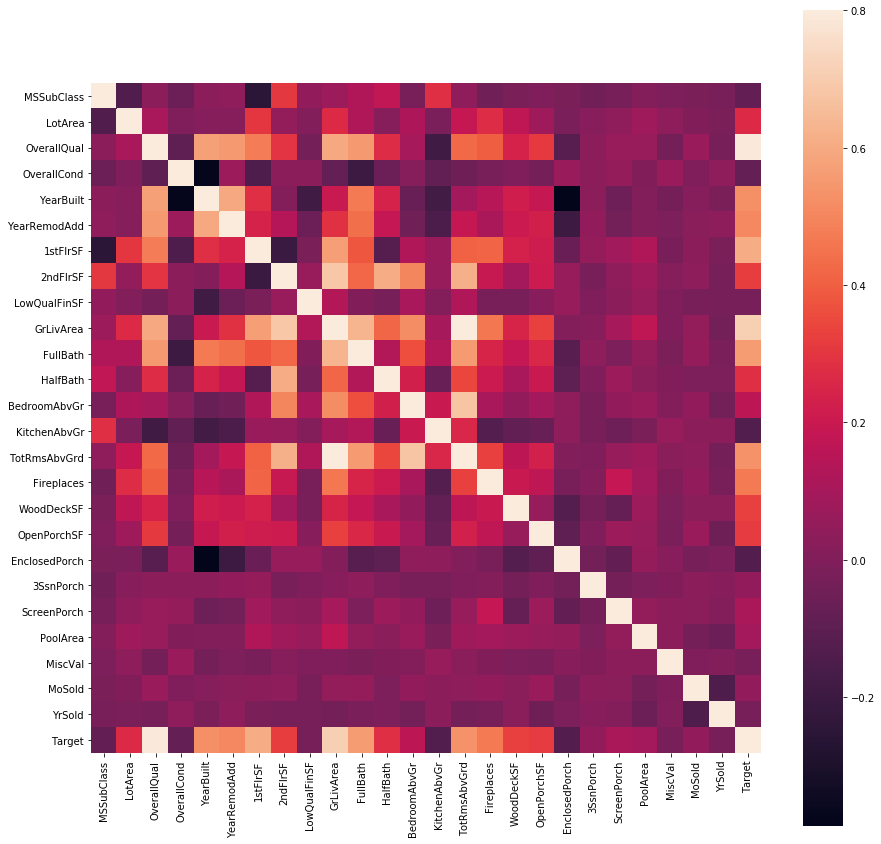

In [256]:

train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target
target = train_data['']
C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [257]:
def OneHotEncode(df ,col_name):
    for col in col_name:
        if(df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df , dummies] , axis=1)
            
            df.drop([col] , axis= 1 , inplace=True)
    return df 

In [258]:
print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [282]:
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]
    return train , test 
  
    

In [283]:
    train, test = split_combined()


In [265]:
#Creating NN
Regressior = Sequential()

In [291]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               19200     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_23 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [292]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


In [293]:
#Training 
NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 1s 539us/step - loss: 130311.7192 - mean_absolute_error: 130311.7192 - val_loss: 54584.8940 - val_mean_absolute_error: 54584.8940

Epoch 00001: val_loss improved from inf to 54584.89400, saving model to Weights-001--54584.89400.hdf5
Epoch 2/500
1168/1168 [==============================] - 0s 83us/step - loss: 56670.5498 - mean_absolute_error: 56670.5498 - val_loss: 49405.6636 - val_mean_absolute_error: 49405.6636

Epoch 00002: val_loss improved from 54584.89400 to 49405.66363, saving model to Weights-002--49405.66363.hdf5
Epoch 3/500
1168/1168 [==============================] - 0s 76us/step - loss: 47827.1230 - mean_absolute_error: 47827.1230 - val_loss: 45033.4569 - val_mean_absolute_error: 45033.4569

Epoch 00003: val_loss improved from 49405.66363 to 45033.45687, saving model to Weights-003--45033.45687.hdf5
Epoch 4/500
1168/1168 [==============================] - 0s 78us/step - l


Epoch 00030: val_loss did not improve from 33609.67482
Epoch 31/500
1168/1168 [==============================] - 0s 92us/step - loss: 30403.0693 - mean_absolute_error: 30403.0693 - val_loss: 34074.2699 - val_mean_absolute_error: 34074.2699

Epoch 00031: val_loss did not improve from 33609.67482
Epoch 32/500
1168/1168 [==============================] - 0s 92us/step - loss: 30127.5536 - mean_absolute_error: 30127.5536 - val_loss: 35601.1981 - val_mean_absolute_error: 35601.1981

Epoch 00032: val_loss did not improve from 33609.67482
Epoch 33/500
1168/1168 [==============================] - 0s 74us/step - loss: 30330.2877 - mean_absolute_error: 30330.2877 - val_loss: 36981.7402 - val_mean_absolute_error: 36981.7402

Epoch 00033: val_loss did not improve from 33609.67482
Epoch 34/500
1168/1168 [==============================] - 0s 74us/step - loss: 31314.5390 - mean_absolute_error: 31314.5390 - val_loss: 33498.9264 - val_mean_absolute_error: 33498.9264

Epoch 00034: val_loss improved from

1168/1168 [==============================] - 0s 89us/step - loss: 28296.5425 - mean_absolute_error: 28296.5425 - val_loss: 41125.6172 - val_mean_absolute_error: 41125.6172

Epoch 00062: val_loss did not improve from 30991.32936
Epoch 63/500
1168/1168 [==============================] - 0s 80us/step - loss: 29929.6653 - mean_absolute_error: 29929.6653 - val_loss: 38461.2435 - val_mean_absolute_error: 38461.2435

Epoch 00063: val_loss did not improve from 30991.32936
Epoch 64/500
1168/1168 [==============================] - 0s 71us/step - loss: 29312.6399 - mean_absolute_error: 29312.6399 - val_loss: 35581.1095 - val_mean_absolute_error: 35581.1095

Epoch 00064: val_loss did not improve from 30991.32936
Epoch 65/500
1168/1168 [==============================] - 0s 75us/step - loss: 27821.8425 - mean_absolute_error: 27821.8425 - val_loss: 31099.9773 - val_mean_absolute_error: 31099.9773

Epoch 00065: val_loss did not improve from 30991.32936
Epoch 66/500
1168/1168 [=========================


Epoch 00093: val_loss improved from 27319.21426 to 26784.46463, saving model to Weights-093--26784.46463.hdf5
Epoch 94/500
1168/1168 [==============================] - 0s 74us/step - loss: 23501.4246 - mean_absolute_error: 23501.4246 - val_loss: 26866.4120 - val_mean_absolute_error: 26866.4120

Epoch 00094: val_loss did not improve from 26784.46463
Epoch 95/500
1168/1168 [==============================] - 0s 74us/step - loss: 23076.2676 - mean_absolute_error: 23076.2676 - val_loss: 31805.8604 - val_mean_absolute_error: 31805.8604

Epoch 00095: val_loss did not improve from 26784.46463
Epoch 96/500
1168/1168 [==============================] - 0s 74us/step - loss: 27419.9316 - mean_absolute_error: 27419.9316 - val_loss: 27006.5497 - val_mean_absolute_error: 27006.5497

Epoch 00096: val_loss did not improve from 26784.46463
Epoch 97/500
1168/1168 [==============================] - 0s 74us/step - loss: 25034.3421 - mean_absolute_error: 25034.3421 - val_loss: 27027.9552 - val_mean_absolute

1168/1168 [==============================] - 0s 80us/step - loss: 22128.0752 - mean_absolute_error: 22128.0752 - val_loss: 25227.9315 - val_mean_absolute_error: 25227.9315

Epoch 00126: val_loss did not improve from 23769.61012
Epoch 127/500
1168/1168 [==============================] - 0s 91us/step - loss: 20822.0074 - mean_absolute_error: 20822.0074 - val_loss: 24211.9270 - val_mean_absolute_error: 24211.9270

Epoch 00127: val_loss did not improve from 23769.61012
Epoch 128/500
1168/1168 [==============================] - 0s 85us/step - loss: 20105.8868 - mean_absolute_error: 20105.8868 - val_loss: 25528.2604 - val_mean_absolute_error: 25528.2604

Epoch 00128: val_loss did not improve from 23769.61012
Epoch 129/500
1168/1168 [==============================] - 0s 84us/step - loss: 20443.5692 - mean_absolute_error: 20443.5692 - val_loss: 27380.8891 - val_mean_absolute_error: 27380.8891

Epoch 00129: val_loss did not improve from 23769.61012
Epoch 130/500
1168/1168 [=====================

1168/1168 [==============================] - ETA: 0s - loss: 18921.8194 - mean_absolute_error: 18921.819 - 0s 74us/step - loss: 18809.6245 - mean_absolute_error: 18809.6245 - val_loss: 21748.6246 - val_mean_absolute_error: 21748.6246

Epoch 00159: val_loss improved from 21877.20660 to 21748.62463, saving model to Weights-159--21748.62463.hdf5
Epoch 160/500
1168/1168 [==============================] - 0s 74us/step - loss: 20531.4253 - mean_absolute_error: 20531.4253 - val_loss: 22570.0400 - val_mean_absolute_error: 22570.0400

Epoch 00160: val_loss did not improve from 21748.62463
Epoch 161/500
1168/1168 [==============================] - 0s 72us/step - loss: 21512.8393 - mean_absolute_error: 21512.8393 - val_loss: 22990.0607 - val_mean_absolute_error: 22990.0607

Epoch 00161: val_loss did not improve from 21748.62463
Epoch 162/500
1168/1168 [==============================] - 0s 73us/step - loss: 19332.1710 - mean_absolute_error: 19332.1710 - val_loss: 24156.2049 - val_mean_absolute_err

1168/1168 [==============================] - 0s 92us/step - loss: 18081.7022 - mean_absolute_error: 18081.7022 - val_loss: 24734.4013 - val_mean_absolute_error: 24734.4013

Epoch 00191: val_loss did not improve from 20805.15347
Epoch 192/500
1168/1168 [==============================] - 0s 86us/step - loss: 19628.3327 - mean_absolute_error: 19628.3327 - val_loss: 25095.4287 - val_mean_absolute_error: 25095.4287

Epoch 00192: val_loss did not improve from 20805.15347
Epoch 193/500
1168/1168 [==============================] - 0s 86us/step - loss: 18438.5810 - mean_absolute_error: 18438.5810 - val_loss: 21845.7666 - val_mean_absolute_error: 21845.7666

Epoch 00193: val_loss did not improve from 20805.15347
Epoch 194/500
1168/1168 [==============================] - 0s 91us/step - loss: 19011.9700 - mean_absolute_error: 19011.9700 - val_loss: 25126.5256 - val_mean_absolute_error: 25126.5256

Epoch 00194: val_loss did not improve from 20805.15347
Epoch 195/500
1168/1168 [=====================

1168/1168 [==============================] - 0s 91us/step - loss: 18791.8764 - mean_absolute_error: 18791.8764 - val_loss: 20538.5574 - val_mean_absolute_error: 20538.5574

Epoch 00224: val_loss did not improve from 20168.93006
Epoch 225/500
1168/1168 [==============================] - 0s 80us/step - loss: 19393.0921 - mean_absolute_error: 19393.0921 - val_loss: 21128.6829 - val_mean_absolute_error: 21128.6829

Epoch 00225: val_loss did not improve from 20168.93006
Epoch 226/500
1168/1168 [==============================] - 0s 74us/step - loss: 18030.0580 - mean_absolute_error: 18030.0580 - val_loss: 21211.7749 - val_mean_absolute_error: 21211.7749

Epoch 00226: val_loss did not improve from 20168.93006
Epoch 227/500
1168/1168 [==============================] - 0s 86us/step - loss: 18764.4495 - mean_absolute_error: 18764.4495 - val_loss: 21739.2089 - val_mean_absolute_error: 21739.2089

Epoch 00227: val_loss did not improve from 20168.93006
Epoch 228/500
1168/1168 [=====================

1168/1168 [==============================] - 0s 74us/step - loss: 20877.8586 - mean_absolute_error: 20877.8586 - val_loss: 20776.5066 - val_mean_absolute_error: 20776.5066

Epoch 00257: val_loss did not improve from 20158.52445
Epoch 258/500
1168/1168 [==============================] - 0s 73us/step - loss: 16802.5139 - mean_absolute_error: 16802.5139 - val_loss: 20786.6585 - val_mean_absolute_error: 20786.6585

Epoch 00258: val_loss did not improve from 20158.52445
Epoch 259/500
1168/1168 [==============================] - 0s 73us/step - loss: 18814.4080 - mean_absolute_error: 18814.4080 - val_loss: 26148.6366 - val_mean_absolute_error: 26148.6366

Epoch 00259: val_loss did not improve from 20158.52445
Epoch 260/500
1168/1168 [==============================] - 0s 76us/step - loss: 17129.6822 - mean_absolute_error: 17129.6822 - val_loss: 26214.7262 - val_mean_absolute_error: 26214.7262

Epoch 00260: val_loss did not improve from 20158.52445
Epoch 261/500
1168/1168 [=====================

1168/1168 [==============================] - 0s 74us/step - loss: 20113.9170 - mean_absolute_error: 20113.9170 - val_loss: 27607.4850 - val_mean_absolute_error: 27607.4850

Epoch 00290: val_loss did not improve from 19584.49481
Epoch 291/500
1168/1168 [==============================] - 0s 77us/step - loss: 18053.4510 - mean_absolute_error: 18053.4510 - val_loss: 21328.3414 - val_mean_absolute_error: 21328.3414

Epoch 00291: val_loss did not improve from 19584.49481
Epoch 292/500
1168/1168 [==============================] - 0s 89us/step - loss: 15359.7597 - mean_absolute_error: 15359.7597 - val_loss: 25881.9074 - val_mean_absolute_error: 25881.9074

Epoch 00292: val_loss did not improve from 19584.49481
Epoch 293/500
1168/1168 [==============================] - 0s 84us/step - loss: 16886.6182 - mean_absolute_error: 16886.6182 - val_loss: 21557.6260 - val_mean_absolute_error: 21557.6260

Epoch 00293: val_loss did not improve from 19584.49481
Epoch 294/500
1168/1168 [=====================

1168/1168 [==============================] - 0s 73us/step - loss: 16634.6007 - mean_absolute_error: 16634.6007 - val_loss: 20785.1445 - val_mean_absolute_error: 20785.1445

Epoch 00324: val_loss did not improve from 19584.49481
Epoch 325/500
1168/1168 [==============================] - 0s 75us/step - loss: 16120.7318 - mean_absolute_error: 16120.7318 - val_loss: 19898.4842 - val_mean_absolute_error: 19898.4842

Epoch 00325: val_loss did not improve from 19584.49481
Epoch 326/500
1168/1168 [==============================] - 0s 74us/step - loss: 15974.8258 - mean_absolute_error: 15974.8258 - val_loss: 22595.8203 - val_mean_absolute_error: 22595.8203

Epoch 00326: val_loss did not improve from 19584.49481
Epoch 327/500
1168/1168 [==============================] - 0s 71us/step - loss: 18605.1321 - mean_absolute_error: 18605.1321 - val_loss: 21707.4225 - val_mean_absolute_error: 21707.4225

Epoch 00327: val_loss did not improve from 19584.49481
Epoch 328/500
1168/1168 [=====================


Epoch 00357: val_loss did not improve from 19584.49481
Epoch 358/500
1168/1168 [==============================] - 0s 92us/step - loss: 15428.2075 - mean_absolute_error: 15428.2075 - val_loss: 20886.8434 - val_mean_absolute_error: 20886.8434

Epoch 00358: val_loss did not improve from 19584.49481
Epoch 359/500
1168/1168 [==============================] - 0s 80us/step - loss: 15861.9917 - mean_absolute_error: 15861.9917 - val_loss: 20241.0840 - val_mean_absolute_error: 20241.0840

Epoch 00359: val_loss did not improve from 19584.49481
Epoch 360/500
1168/1168 [==============================] - 0s 72us/step - loss: 15726.9301 - mean_absolute_error: 15726.9301 - val_loss: 24328.3615 - val_mean_absolute_error: 24328.3615

Epoch 00360: val_loss did not improve from 19584.49481
Epoch 361/500
1168/1168 [==============================] - 0s 72us/step - loss: 16823.6552 - mean_absolute_error: 16823.6552 - val_loss: 24556.3907 - val_mean_absolute_error: 24556.3907

Epoch 00361: val_loss did not i

1168/1168 [==============================] - 0s 80us/step - loss: 14432.8364 - mean_absolute_error: 14432.8364 - val_loss: 19853.3008 - val_mean_absolute_error: 19853.3008

Epoch 00391: val_loss did not improve from 19454.17080
Epoch 392/500
1168/1168 [==============================] - 0s 73us/step - loss: 14878.8127 - mean_absolute_error: 14878.8127 - val_loss: 23418.5950 - val_mean_absolute_error: 23418.5950

Epoch 00392: val_loss did not improve from 19454.17080
Epoch 393/500
1168/1168 [==============================] - 0s 73us/step - loss: 15246.3189 - mean_absolute_error: 15246.3189 - val_loss: 19834.6780 - val_mean_absolute_error: 19834.6780

Epoch 00393: val_loss did not improve from 19454.17080
Epoch 394/500
1168/1168 [==============================] - 0s 74us/step - loss: 14908.7822 - mean_absolute_error: 14908.7822 - val_loss: 22646.4210 - val_mean_absolute_error: 22646.4210

Epoch 00394: val_loss did not improve from 19454.17080
Epoch 395/500
1168/1168 [=====================


Epoch 00424: val_loss did not improve from 19318.51589
Epoch 425/500
1168/1168 [==============================] - 0s 74us/step - loss: 14403.5522 - mean_absolute_error: 14403.5522 - val_loss: 21393.9490 - val_mean_absolute_error: 21393.9490

Epoch 00425: val_loss did not improve from 19318.51589
Epoch 426/500
1168/1168 [==============================] - 0s 74us/step - loss: 15374.5134 - mean_absolute_error: 15374.5134 - val_loss: 22105.8310 - val_mean_absolute_error: 22105.8310

Epoch 00426: val_loss did not improve from 19318.51589
Epoch 427/500
1168/1168 [==============================] - 0s 74us/step - loss: 17331.4238 - mean_absolute_error: 17331.4238 - val_loss: 19798.4910 - val_mean_absolute_error: 19798.4910

Epoch 00427: val_loss did not improve from 19318.51589
Epoch 428/500
1168/1168 [==============================] - 0s 73us/step - loss: 15320.8528 - mean_absolute_error: 15320.8528 - val_loss: 24041.2016 - val_mean_absolute_error: 24041.2016

Epoch 00428: val_loss did not i

1168/1168 [==============================] - 0s 85us/step - loss: 15717.9637 - mean_absolute_error: 15717.9637 - val_loss: 22107.0603 - val_mean_absolute_error: 22107.0603

Epoch 00458: val_loss did not improve from 19063.81694
Epoch 459/500
1168/1168 [==============================] - 0s 75us/step - loss: 14261.5299 - mean_absolute_error: 14261.5299 - val_loss: 20440.2540 - val_mean_absolute_error: 20440.2540

Epoch 00459: val_loss did not improve from 19063.81694
Epoch 460/500
1168/1168 [==============================] - 0s 73us/step - loss: 14129.6813 - mean_absolute_error: 14129.6813 - val_loss: 19244.8744 - val_mean_absolute_error: 19244.8744

Epoch 00460: val_loss did not improve from 19063.81694
Epoch 461/500
1168/1168 [==============================] - 0s 76us/step - loss: 14728.1609 - mean_absolute_error: 14728.1609 - val_loss: 24750.9714 - val_mean_absolute_error: 24750.9714

Epoch 00461: val_loss did not improve from 19063.81694
Epoch 462/500
1168/1168 [=====================


Epoch 00491: val_loss did not improve from 19010.31817
Epoch 492/500
1168/1168 [==============================] - 0s 80us/step - loss: 14181.2338 - mean_absolute_error: 14181.2338 - val_loss: 19913.3750 - val_mean_absolute_error: 19913.3750

Epoch 00492: val_loss did not improve from 19010.31817
Epoch 493/500
1168/1168 [==============================] - 0s 74us/step - loss: 15088.4944 - mean_absolute_error: 15088.4944 - val_loss: 21331.7443 - val_mean_absolute_error: 21331.7443

Epoch 00493: val_loss did not improve from 19010.31817
Epoch 494/500
1168/1168 [==============================] - 0s 76us/step - loss: 15507.8582 - mean_absolute_error: 15507.8582 - val_loss: 20181.7778 - val_mean_absolute_error: 20181.7778

Epoch 00494: val_loss did not improve from 19010.31817
Epoch 495/500
1168/1168 [==============================] - 0s 74us/step - loss: 17140.7828 - mean_absolute_error: 17140.7828 - val_loss: 21407.7377 - val_mean_absolute_error: 21407.7377

Epoch 00495: val_loss did not i

In [296]:

def make_submission(prediction, sub_name):
    my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
    my_submission.to_csv('{}.csv'.format(sub_name),index=False)
    print('A submission file has been made')
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'TestNN.csv')

A submission file has been made


In [297]:
testnn = pd.read_csv('TestNN.csv.csv')

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1459]